In [1]:
import pathlib
import pylab as plt
import numpy as np
from numpy import unique
from numpy import where
import pandas as pd
import matplotlib
import seaborn as sns
import sys

In [2]:
sns.set_style('white')

In [3]:
PRJ='PRJNA602160'
BASE_PATH='Data/Assembly/'
DATA_PATH=f'{BASE_PATH}{PRJ}/'
MT_DATA_PATH=DATA_PATH+'/Mt/'
ALIGNER='minimap2'
POSTFIX='_x_sr_secondary_no_ncbi_mt_20220505_minimap2_gatk_sorted_marked_coverage.out_taxa.csv'
PARAMS='default'
#PARAMS='smL0_0'
PLOT_PATH=DATA_PATH+f'general_plots/'
PLOT_DATA_FILE=f'df_Mt_{PARAMS}_min_cov_5_concat.csv'
ITERATION=0
MIN_COV=5
#MAX_COV=10

In [4]:
SRAs=['SRR10915149','SRR10915150','SRR10915151','SRR10915152','SRR10915153',\
      'SRR10915154','SRR10915155','SRR10915156','SRR10915157','SRR10915158',\
      'SRR10915159','SRR10915160','SRR10915161','SRR10915162','SRR10915163',\
      'SRR10915164','SRR10915165','SRR10915166','SRR10915167','SRR10915168',\
      'SRR10915169','SRR10915170','SRR10915171','SRR10915172','SRR10915173','SRR10915174']

In [5]:
dfs=[]
for sra in SRAs:
    df=pd.read_csv(DATA_PATH+sra+'/'+ALIGNER+'/'+sra+POSTFIX)
    df['BioProject']=[PRJ]*len(df)
    df['SRA']=[sra]*len(df)
    df=df.rename(columns=lambda x: x.strip())
    dfs.append(df)
df_all= pd.concat(dfs)

In [6]:
df_all.shape

(104339, 13)

In [7]:
#df_all = df_all.loc[df_all['coverage'] >=MIN_COV]

In [8]:
df_all.head()

,Unnamed: 0,#rname,startpos,endpos,numreads,covbases,coverage,meandepth,meanbaseq,meanmapq,taxa,BioProject,SRA
0,0,NC_007886.1,1,491515,25033,180430,36.7090,4.26135,38.9,0.0624,Oryza sativa,PRJNA602160,SRR10915149
1,1,NC_013816.1,1,559045,26547,204591,36.5965,3.95157,38.9,0.0104,Oryza rufipogon,PRJNA602160,SRR10915149
2,2,NC_011033.1,1,490520,23973,178039,36.2960,4.04065,38.9,0.0332,Oryza sativa,PRJNA602160,SRR10915149
3,3,NC_012920.1,1,16569,55,4660,28.1248,0.37039,36.9,26.5000,Homo sapiens,PRJNA602160,SRR10915149
4,4,NC_029816.1,1,515022,17979,133007,25.8255,2.71346,38.9,0.4160,Oryza minuta,PRJNA602160,SRR10915149


In [9]:
### filter to => n%
df_all = df_all.loc[df_all['coverage'] >=MIN_COV]
#optional
#df_all = df_all.loc[df_all['coverage'] <MAX_COV]

In [10]:
df_all.drop(columns=['Unnamed: 0'],inplace=True)
df_all.reset_index(drop=True, inplace=True)

In [11]:
df_sra_names=pd.read_csv(DATA_PATH+'general_plots/HKU4rCoV_SI_SRA_datasets.tsv', sep='\t')

In [12]:
df_sra_names=df_sra_names.rename(columns=lambda x: x.strip())

In [13]:
df_sra_names.head(n=2)

,Run,BioSample,Assay Type,Bases,Bytes,Uncompressed,Experiment,genotype/variation,GEO_Accession,LibrarySelection,LibrarySource,Sample Name,source_name,Tissue,ReleaseDate,LoadDate,spots,bases
0,SRR10915149,SAMN13884669,Bisulfite-Seq,9.53 G,3.99 Gb,24G,SRX7582551,WT,GSM4276680,RANDOM,GENOMIC,GSM4276680,egg,mature egg isolated from ovule,2020-02-09 12:38:31,2020-01-19 19:21:50,63550036,9532505400
1,SRR10915150,SAMN13884668,Bisulfite-Seq,10.57 G,4.43 Gb,26G,SRX7582552,WT,GSM4276681,RANDOM,GENOMIC,GSM4276681,egg,mature egg isolated from ovule,2020-02-09 12:38:31,2020-01-19 19:16:05,70472455,10570868250


In [14]:
sras=df_sra_names['Run'].tolist()
sample_names=df_sra_names['Sample Name'].tolist()

In [15]:
df_all["sample_name"] = ""

In [16]:
df_all.index

RangeIndex(start=0, stop=683, step=1)

In [17]:
for i in df_all.index:
    for j,s in enumerate(sras):
        if df_all['SRA'].loc[df_all.index[i]].strip()==s.strip():
            df_all.at[i, 'sample_name'] = sras[j]

In [18]:
df_all['taxa'] = df_all['taxa'].str.replace('mitochondrion, complete genome\n','')
df_all['taxa'] = df_all['taxa'].str.replace(', complete sequence\n','')

In [19]:
df_all.loc[df_all['taxa'] == 'Homo sapiens']

,#rname,startpos,endpos,numreads,covbases,coverage,meandepth,meanbaseq,meanmapq,taxa,BioProject,SRA,sample_name
3,NC_012920.1,1,16569,55,4660,28.12480,0.370390,36.9,26.500,Homo sapiens,PRJNA602160,SRR10915149,SRR10915149
6,NC_011137.1,1,16565,17,1454,8.77754,0.098038,37.8,10.400,Homo sapiens,PRJNA602160,SRR10915149,SRR10915149
30,NC_012920.1,1,16569,63,4946,29.85090,0.449031,37.9,28.300,Homo sapiens,PRJNA602160,SRR10915150,SRR10915150
32,NC_011137.1,1,16565,22,1986,11.98910,0.142288,38.3,3.860,Homo sapiens,PRJNA602160,SRR10915150,SRR10915150
54,NC_012920.1,1,16569,471,10898,65.77340,3.105500,37.7,19.100,Homo sapiens,PRJNA602160,SRR10915151,SRR10915151
58,NC_011137.1,1,16565,169,4493,27.12350,0.994688,37.4,6.100,Homo sapiens,PRJNA602160,SRR10915151,SRR10915151
75,NC_012920.1,1,16569,543,9469,57.14890,3.610360,38.2,19.100,Homo sapiens,PRJNA602160,SRR10915152,SRR10915152
79,NC_011137.1,1,16565,174,5037,30.40750,1.086330,38.0,9.430,Homo sapiens,PRJNA602160,SRR10915152,SRR10915152
100,NC_012920.1,1,16569,45,4223,25.48740,0.318667,37.9,33.900,Homo sapiens,PRJNA602160,SRR10915153,SRR10915153
103,NC_011137.1,1,16565,11,1395,8.42137,0.086689,37.0,1.730,Homo sapiens,PRJNA602160,SRR10915153,SRR10915153


In [21]:
#write out to one file 
df_all.to_csv(DATA_PATH+f'general_plots/all_MT_{MIN_COV}pct_coverage_'+ALIGNER)

In [251]:
df_pivot=df_all.pivot_table(index='sample_name', columns='taxa', values='coverage')

In [252]:
df_pivot.head()

taxa,Danio nigrofasciatus,Danio rerio,Homo heidelbergensis,Homo sapiens,Homo sp.,Mus musculus,Oryza minuta,Oryza rufipogon,Oryza sativa
sample_name,,,,,,,,,
SRR10915149,NaN,NaN,NaN,28.12480,NaN,NaN,25.8255,36.5965,36.50250
SRR10915150,NaN,NaN,NaN,29.85090,NaN,NaN,26.7827,37.6458,38.02515
SRR10915151,NaN,NaN,NaN,46.44845,NaN,NaN,22.7006,33.3179,32.99330
SRR10915152,NaN,NaN,NaN,43.77820,NaN,NaN,23.4095,33.5833,32.35125
SRR10915153,NaN,NaN,NaN,25.48740,NaN,NaN,23.6378,34.0636,34.71060


In [253]:
def get_samples(y_labels, df_datasets):
    y_names=[]
    for sra in y_labels:
        y_names.append(df_datasets.loc[df_datasets['SRA'] == sra.strip(), 'Name'].values[0])
    return y_names

In [254]:
def get_accessions(x_labels, df_accessions):
    x_codes=[]
    for accession in x_labels:
        x_codes.append(df_accessions.loc[df_accessions['Accession'] == accession.strip(), 'Code'].values[0])
    return x_codes

In [255]:
df_pivot=df_pivot.T
data=df_pivot.to_numpy()

y_labels=df_pivot.index.tolist()
x_labels=list(df_pivot.columns.values)

In [256]:
y_names=y_labels
x_codes=x_labels

In [257]:
plot_data = np.ma.masked_equal(data[:,:], 0)

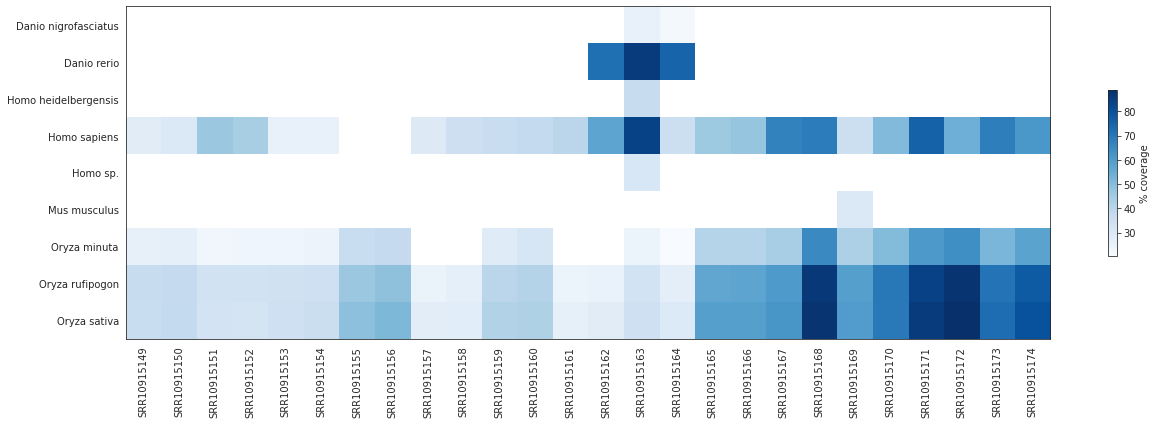

In [259]:
sns.set_style('white')
#13 for smL0_0 min_cov 10
fig, ax = plt.subplots(figsize=(18,6))
#img=ax.imshow(plot_data, cmap=plt.cm.get_cmap("Reds"), interpolation="nearest", aspect='auto',norm=matplotlib.colors.LogNorm())
img=ax.imshow(plot_data, cmap=plt.cm.get_cmap("Blues"), interpolation="nearest", aspect='auto')

ax.set_xticks(list(range(len(x_codes))))
ax.set_xticklabels(x_codes,rotation=90)
ax.set_yticks(list(range(len(y_names))))
ax.set_yticklabels(y_names)

cbar=fig.colorbar(img, label='% coverage', shrink=0.5)

plt.tight_layout()
fig.savefig(PLOT_PATH+f"Mt_{ALIGNER}_{PARAMS}_min_cov_{MIN_COV}_N.png", bbox_inches='tight')
